## 19.2.3 First Neural Network

In [52]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

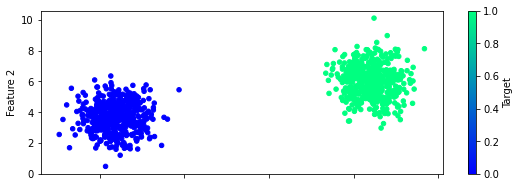

In [53]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(figsize = (9,3), x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [54]:
# Use sklearn to split dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [55]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
# Create the Keras Sequential model
# nn_model stores the entire architecture of our neural network model
nn_model = tf.keras.models.Sequential()

In [57]:
# Add our first Dense layer, including the input layer
# Defining an activation function as part of the first layer is suggested but not required.  
# By default, a dense layer will look for linear relationships
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [58]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [59]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 870us/step - loss: 0.6851 - accuracy: 0.5160
Epoch 2/100
24/24 [==============================] - 0s 837us/step - loss: 0.6782 - accuracy: 0.5160
Epoch 3/100
24/24 [==============================] - 0s 563us/step - loss: 0.6692 - accuracy: 0.5160
Epoch 4/100
24/24 [==============================] - 0s 563us/step - loss: 0.6576 - accuracy: 0.6133
Epoch 5/100
24/24 [==============================] - 0s 607us/step - loss: 0.6438 - accuracy: 0.6107
Epoch 6/100
24/24 [==============================] - 0s 607us/step - loss: 0.6282 - accuracy: 0.9173
Epoch 7/100
24/24 [==============================] - 0s 607us/step - loss: 0.6120 - accuracy: 0.9533
Epoch 8/100
24/24 [==============================] - 0s 563us/step - loss: 0.5957 - accuracy: 0.9747
Epoch 9/100
24/24 [==============================] - 0s 650us/step - loss: 0.5792 - accuracy: 0.9893
Epoch 10/100
24/24 [==============================] - 0s 650us/step - loss: 0.5629 - accura

<AxesSubplot:>

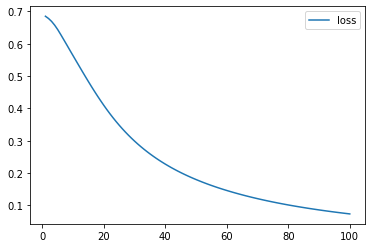

In [62]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

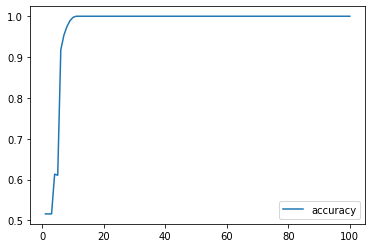

In [63]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0806 - accuracy: 1.0000
Loss: 0.08059484511613846, Accuracy: 1.0


In [65]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

## 19.2.4 Nonlinear Data

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

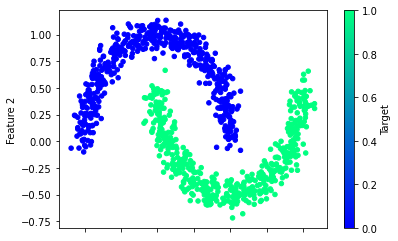

In [67]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [68]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [69]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 978us/step - loss: 0.8648 - accuracy: 0.5667
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7622 - accuracy: 0.5867
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.6027
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6402 - accuracy: 0.6200
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6027 - accuracy: 0.6400
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5717 - accuracy: 0.6627
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5461 - accuracy: 0.6707
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.6800
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5053 - accuracy: 0.6933
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4884 - accuracy: 0.7067
Epoch 1

<AxesSubplot:>

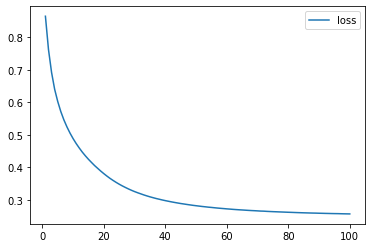

In [70]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

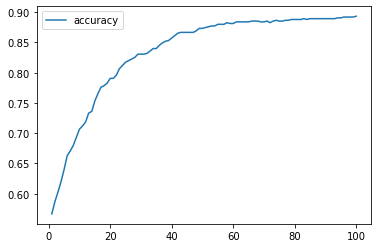

In [71]:
# Plot the accuracy
history_df.plot(y="accuracy")

## Multiple Neuron Network

### A good rule of thumb for a basic neural network is to have two to three times the amount of neurons in the hidden layer as the number of inputs.

In [73]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [74]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [75]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 693us/step - loss: 0.6602 - accuracy: 0.7280
Epoch 2/100
24/24 [==============================] - 0s 650us/step - loss: 0.6346 - accuracy: 0.7667
Epoch 3/100
24/24 [==============================] - 0s 822us/step - loss: 0.6078 - accuracy: 0.7813
Epoch 4/100
24/24 [==============================] - 0s 823us/step - loss: 0.5801 - accuracy: 0.8240
Epoch 5/100
24/24 [==============================] - 0s 780us/step - loss: 0.5518 - accuracy: 0.8813
Epoch 6/100
24/24 [==============================] - 0s 867us/step - loss: 0.5235 - accuracy: 0.8867
Epoch 7/100
24/24 [==============================] - 0s 954us/step - loss: 0.4958 - accuracy: 0.8933
Epoch 8/100
24/24 [==============================] - 0s 780us/step - loss: 0.4692 - accuracy: 0.8960
Epoch 9/100
24/24 [==============================] - 0s 910us/step - loss: 0.4440 - accuracy: 0.8960
Epoch 10/100
24/24 [==============================] - 0s 910us/step - loss: 0.4204 - accura